In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/K2CO3-all.csv')
df

,metal_initial_conc,metal_mmol,K2CO3_initial_conc,K2CO3_mmol,K2CO3_vol,ph,rate,total_vol,metal_total_conc,K2CO3_total_conc,...,ionic_total,precipitation_order,OH_total,Q_Fe(OH)3,logQ_Fe(OH)3,Q_Co(OH)2,FeCl3,destination,XRD,singlephase
0,3.00,0.9,0.15,1.3500,9.00,11.738561,1,9.30,0.100000,0.150000,...,0.952650,1,0.005301,9.928170e-09,-8.003131,4.682620e-07,1,0227-17,"Spinel,ZnO",False
1,0.30,0.9,0.15,1.3500,9.00,11.738561,1,12.00,0.080000,0.110000,...,0.732054,1,0.004108,3.697130e-09,-8.432136,2.250000e-07,1,0227-19,"Spinel,ZnO",False
2,3.00,1.5,0.15,1.3500,9.00,11.738561,6,9.50,0.160000,0.140000,...,1.222594,1,0.005189,1.490280e-08,-7.826733,7.180060e-07,1,0227-21,"Spinel,?",False
3,0.30,0.9,0.15,1.3500,9.00,11.738561,6,12.00,0.080000,0.110000,...,0.732054,1,0.004108,3.697130e-09,-8.432136,2.250000e-07,1,0227-23,"Spinel,ZnO",False
4,3.00,1.5,0.45,1.3500,3.00,11.977121,1,3.50,0.430000,0.390000,...,3.324066,1,0.008132,1.541350e-07,-6.812099,4.738780e-06,1,0227-25,"Spinel,Fe2O3",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.17,1.0,0.41,1.5006,3.66,11.956907,6,9.54,0.104822,0.157233,...,0.997544,0,0.003474,2.930080e-09,-8.533121,2.108530e-07,0,0509-#21,NaN,True
66,1.00,0.5,0.15,0.7500,5.00,11.738561,1,5.50,0.090000,0.140000,...,0.872490,1,0.004979,7.407220e-09,-8.130345,3.719010e-07,0,0514-#21,NaN,True
67,1.00,0.5,0.15,0.7500,5.00,11.738561,6,5.50,0.090000,0.140000,...,0.872490,1,0.004979,7.407220e-09,-8.130345,3.719010e-07,0,0514-#22,NaN,False
68,1.00,0.5,0.45,0.7515,1.67,11.977121,1,2.17,0.230000,0.350000,...,2.203650,1,0.007301,5.967200e-08,-7.224229,2.043300e-06,0,0514-#23,NaN,False


In [3]:
def read_and_preprocess_data(file_path, random_state=0):
    # Load data from CSV file
    df = pd.read_csv(file_path)

    # Shuffle the data
    np.random.seed(random_state)
    random_indices = np.random.permutation(df.index)
    df = df.reindex(random_indices).reset_index(drop=True)

    # Preprocessing the 'precipitation_order' column
    if 'precipitation_order' in df.columns:
        df['precipitation_order'] = df['precipitation_order'].replace({'reverse': 1.0, 'normal': 0.0})

    # List of columns to drop if they exist
    columns_to_drop = ['XRD', 'destination', 'total_vol', 'FeCl3']
    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

    # Preprocessing the target column (y_label)
    y_label = 'singlephase'
    if y_label in df.columns:
        df[y_label] = df[y_label].replace({'TRUE': True, 'FALSE': False, 'no': None})

        # Drop rows with None in the target column
        df = df.dropna(subset=[y_label]).reset_index(drop=True)

        # Convert target column to float
        df[y_label] = df[y_label].astype(np.float32)

    # Split data into features (X) and target (y)
    y = df[y_label]
    X = df.drop(columns=[y_label], errors='ignore')

    return X, y, df

X, y, df = read_and_preprocess_data('../data/K2CO3-all.csv')
df

,metal_initial_conc,metal_mmol,K2CO3_initial_conc,K2CO3_mmol,K2CO3_vol,ph,rate,metal_total_conc,K2CO3_total_conc,ionic_Fe3+,...,ionic_OH-,ionic_CO32-,ionic_metal,ionic_total,precipitation_order,OH_total,Q_Fe(OH)3,logQ_Fe(OH)3,Q_Co(OH)2,singlephase
0,0.200000,1.200000,0.450000,1.800000,4.00,11.977121,6,0.120000,0.180000,0.360000,...,0.001897,0.360000,0.440000,1.141897,0,0.003795,4.371530e-09,-8.359366,2.880000e-07,0.0
1,1.100000,1.800000,0.330000,2.692800,8.16,11.909772,2,0.180000,0.280000,0.540000,...,0.003379,0.560000,0.660000,1.743379,0,0.006758,3.703060e-08,-7.431439,1.369960e-06,0.0
2,1.666667,1.000000,0.450000,1.498500,3.33,11.977121,6,0.254453,0.381298,0.763359,...,0.004019,0.762595,0.932994,2.420177,1,0.008038,8.811200e-08,-7.054965,2.740330e-06,0.0
3,2.500000,1.000000,0.280000,1.800400,6.43,11.874094,2,0.150000,0.260000,0.450000,...,0.003523,0.520000,0.550000,1.533523,1,0.007045,3.496660e-08,-7.456347,1.240820e-06,0.0
4,0.600000,1.800000,0.430000,2.674600,6.22,11.967249,2,0.200000,0.290000,0.600000,...,0.003131,0.580000,0.733333,1.873131,0,0.006263,3.275510e-08,-7.484721,1.307490e-06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1.670000,1.500000,0.450000,2.700000,6.00,11.977121,6,0.220000,0.390000,0.660000,...,0.004125,0.780000,0.806667,2.274125,1,0.008249,8.233830e-08,-7.084398,2.495270e-06,0.0
66,1.000000,0.500000,0.150000,0.750000,5.00,11.738561,6,0.090000,0.140000,0.270000,...,0.002490,0.280000,0.330000,0.872490,1,0.004979,7.407220e-09,-8.130345,3.719010e-07,1.0
67,1.040000,1.000000,0.300000,1.500000,5.00,11.889076,6,0.167785,0.251678,0.503356,...,0.003249,0.503356,0.615213,1.597209,0,0.006498,3.069450e-08,-7.512939,1.180870e-06,0.0
68,1.914894,0.995745,0.353866,1.500393,4.24,11.924935,1,0.209190,0.315209,0.627570,...,0.003747,0.630417,0.767030,1.995323,1,0.007494,5.868540e-08,-7.231470,1.957840e-06,0.0


In [4]:
# # df = pd.read_csv('K2CO3-all.csv', usecols=['rate', 'FeCl3', 'precipitation_order',
# #                                            'singlephase', 'ionic_total','ionic_metal',
# #                                           'Q_Fe(OH)3', 'metal_total_conc', 'K2CO3_total_conc', 'ph'])

# df = pd.read_csv('../data/K2CO3-all.csv')

# random_indices = np.random.permutation(df.index)
# df = df.reindex(random_indices).reset_index(drop=True)


# #%% preprocessing df
# # replace the value 'reverse' in the column "precipitation_order" as 1
# df['precipitation_order'] = df['precipitation_order'].replace('reverse', 1.0)
# # replace the value 'normal' in the column "precipitation_order" as 0 for X
# df['precipitation_order'] = df['precipitation_order'].replace('normal', 0.0)

# df = df.drop(columns=['XRD', 'destination', 'total_vol'])

# # df = df.drop(columns=['temperature', 'precipitation_order', 'K2CO3_conc', 'total volume'])

# y_label = 'singlephase'
# #%% preprocessing y
# # replace "True" as True, "False" as False, and "no" as None
# # single phase is positve, multiphase is negative
# df[y_label] = df[y_label].replace('TRUE', True)
# df[y_label] = df[y_label].replace('FALSE', False)
# df[y_label] = df[y_label].replace('no', None)
# # No means xrd can’t be measured due to sample size
# # drop rows with None in the column y_label
# df = df.dropna(subset=[y_label]).reset_index(drop=True)
# # set df[y_label] to boolean
# df[y_label] = df[y_label].astype(np.float32)

# ## Applying log
# # df['logQ_Co(OH)2'] = df['Q_Co(OH)2'].apply(lambda x: np.log(x))
# # df['logOH_total'] = df['OH_total'].apply(lambda x: np.log(x))

# # df = df.drop(columns=['Q_Co(OH)2','OH_total'])

# y = df[y_label]

# X = df.drop(columns=[y_label, 'FeCl3'])

# df

In [5]:
X.columns

Index(['metal_initial_conc', 'metal_mmol', 'K2CO3_initial_conc', 'K2CO3_mmol',
       'K2CO3_vol', 'ph', 'rate', 'metal_total_conc', 'K2CO3_total_conc',
       'ionic_Fe3+', 'ionic_Cl-', 'ionic_Co2+', 'ionic_Zn2+', 'ionic_NO3-',
       'ionic_Na+', 'ionic_K+', 'ionic_OH-', 'ionic_CO32-', 'ionic_metal',
       'ionic_total', 'precipitation_order', 'OH_total', 'Q_Fe(OH)3',
       'logQ_Fe(OH)3', 'Q_Co(OH)2'],
      dtype='object')

In [6]:
len(X.columns)

25

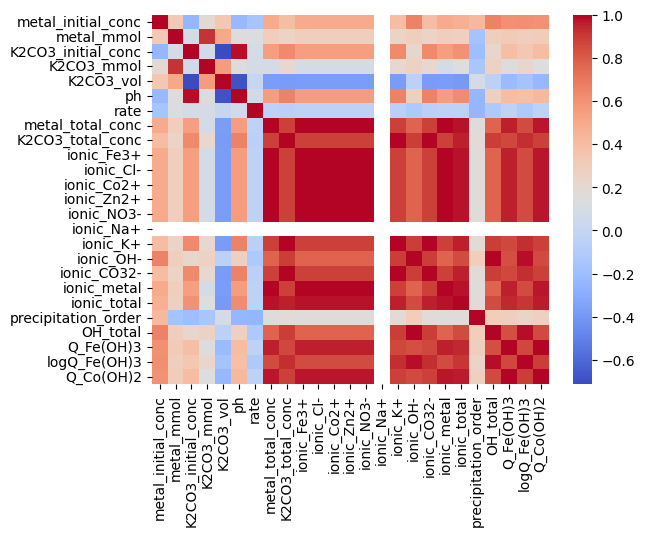

In [7]:
correlation_matrix  = X.corr(numeric_only=True)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()

In [8]:
def drop_highly_correlated_columns(df, y_label, excluded_col='ionic_Na+', threshold=0.55):
    """
    Drops columns from the dataframe that are highly correlated above a given threshold.
    
    Parameters:
    - df: DataFrame containing the data.
    - y_label: The target label column to exclude from the correlation calculation.
    - excluded_col: Column to exclude from the correlation calculation (default: 'ionic_Na+').
    - threshold: Correlation threshold above which columns will be dropped (default: 0.55).
    
    Returns:
    - DataFrame with highly correlated columns dropped.
    """
    
    # Drop the target label and excluded column from the features
    X = df.drop(columns=[y_label, excluded_col])

    # Compute the absolute correlation matrix
    corr_matrix = X.corr().abs()

    # Identify columns to drop based on the correlation threshold
    columns_to_drop = set()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold:
                colname = corr_matrix.columns[i]
                columns_to_drop.add(colname)

    # Drop the identified columns
    X = X.drop(columns=columns_to_drop)

    return X

X = drop_highly_correlated_columns(df, y_label='singlephase', threshold=0.55)

<AxesSubplot: >

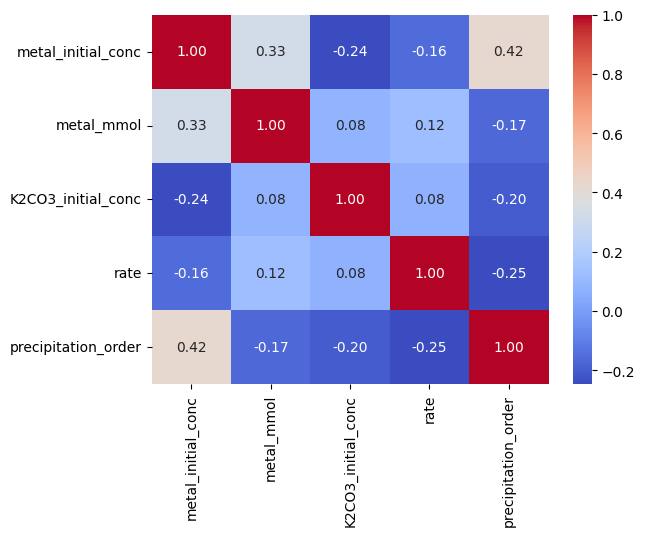

In [9]:
# New coorelation matrix

reduced_correlation_matrix  = X.corr(numeric_only=True)
sns.heatmap(reduced_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

(array([53.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 17.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

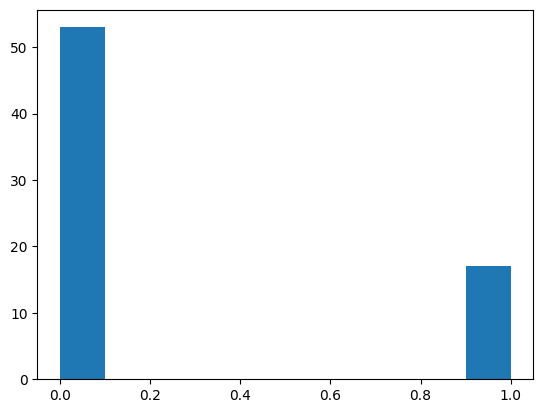

In [10]:
plt.hist(y)

## Using kernel learning

In [11]:
def kernel_numeric(x1, x2, kernel_type='RBF', gamma=1.0):
    """
    Compute kernel between two vectors.
    
    Parameters:
    - x1, x2: Input vectors.
    - kernel_type: Type of the kernel to use ('RBF', 'Manhattan', 'Euclidean').
    - gamma: Gamma parameter for the RBF kernel, where gamma = 1 / (2 * sigma^2).
    
    Returns:
    - The kernel value based on the selected kernel type.
    """
    if kernel_type == 'Euclidean':
        return np.sqrt(np.sum((x1 - x2) ** 2))
    elif kernel_type == 'Manhattan':
        return np.sum(np.abs(x1 - x2))
    elif kernel_type == 'RBF':
        distance_squared = np.sum((x1 - x2) ** 2)
        return np.exp(-gamma * distance_squared)

def compute_distances(X1, X2, kernel_type='Euclidean', gamma=0.1):
    """
    Compute distances or kernel values between two sets of vectors.

    Parameters:
    - X1, X2: Input datasets. Each should be a NumPy array of shape (n_samples, n_features).
    - kernel_type: Type of the metric or kernel to compute ('RBF', 'Manhattan', 'Euclidean').
    - gamma: Gamma parameter for the RBF kernel, where gamma = 1 / (2 * sigma^2).

    Returns:
    - A matrix of distances or kernel values.
    """
    # Calculate the pairwise difference matrix
    diff = X1[:, np.newaxis, :] - X2[np.newaxis, :, :]


    if kernel_type == 'Euclidean':
        # Compute Euclidean distance
        distances = np.sqrt(np.sum(diff**2, axis=2, keepdims=False))
    elif kernel_type == 'Manhattan':
        # Compute Manhattan distance
        distances = np.sum(np.abs(diff), axis=2, keepdims=False)
    elif kernel_type == 'RBF':
        # Compute RBF kernel
        distance_squared = np.sum(diff**2, axis=2, keepdims=False)
        distances = np.exp(-gamma * distance_squared)
    else:
        raise ValueError("Unsupported kernel type")

    return distances


In [38]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from tqdm import tqdm

def train_and_predict_with_loocv(X, y, kernel_type='Euclidean', gamma=0.1, random_state=42):
    """
    Train a model using LOOCV, make predictions, and compute uncertainties.

    Parameters:
    - X: Features dataframe (input data).
    - y: Target values.
    - kernel_type: The kernel type to use for distance computation ('Euclidean', 'Manhattan', 'RBF').
    - gamma: Gamma parameter for the RBF kernel (default: 0.1).
    - random_state: Random seed for reproducibility (default: 42).

    Returns:
    - predictions: Array of predicted labels for each sample.
    - uncertainties: Array of uncertainty estimates for each prediction.
    """
    
    # Define the classifier
    clf = SVC(kernel='rbf', probability=True, random_state=random_state, class_weight='balanced')

    # Initialize LeaveOneOut
    loo = LeaveOneOut()

    # Arrays to store the predictions and uncertainties for each sample
    predictions = np.zeros(len(y))
    uncertainties = np.zeros(len(y))

    # Perform LOOCV
    for train_index, test_index in tqdm(loo.split(X), total=loo.get_n_splits(X), desc="Processing LeaveOneOut"):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Standardize each feature
        scaler = MinMaxScaler()
        X_train_S = scaler.fit_transform(X_train)
        X_test_S = scaler.transform(X_test)
        
        # Compute kernel or distances
        X_train_sfs = compute_distances(X_train_S, X_train_S, kernel_type=kernel_type, gamma=gamma)
        X_test_sfs = compute_distances(X_test_S, X_train_S, kernel_type=kernel_type, gamma=gamma)

        # Fit the model
        clf.fit(X_train_sfs, y_train)
        
        # Make predictions and store them
        decision_function = clf.decision_function(X_test_sfs)
        predictions[test_index] = clf.predict(X_test_sfs)
        uncertainties[test_index] = np.abs(decision_function) 

    # Normalize uncertainties to range [0, 1] for better interpretation
    uncertainties = 1 - uncertainties / np.max(uncertainties)

    return predictions, uncertainties

predictions, uncertainties = train_and_predict_with_loocv(X, y, kernel_type='Euclidean', gamma=0.1)
print(f'Predictions: {predictions}')
print(f'Uncertainty estimates: {uncertainties}')


Processing LeaveOneOut: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:00<00:00, 323.43it/s]

Predictions: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
Uncertainty estimates: [0.51897006 0.12587422 0.29955065 0.3226477  0.48693173 0.30022264
 0.42737175 0.95219469 0.36407804 0.60586336 0.33872179 0.62040005
 0.51410142 0.33872179 0.35498331 0.61582618 0.95219469 0.35498331
 0.35891713 0.51338634 0.33872179 0.45869157 0.44969547 0.29865155
 0.35499398 0.58204855 0.65967303 0.25867739 0.39922708 0.341089
 0.32262573 0.35498331 0.35490477 0.60230634 0.82579313 0.82732448
 0.19635825 0.52964555 0.35466263 0.65967303 0.21704978 0.97716566
 0.35055733 0.71439087 0.         0.39005476 0.35490477 0.35490477
 0.67230755 0.52854007 0.67026634 0.11657577 0.60586336 0.3683476
 0.35481649 0.91475632 0.20828728 0.72415556 0.82732448 0.91030891
 0.91030891 0.41520098 0.2562225  0.86000699 0.65534223 0.17395015
 0.3547221  0.61

In [13]:
# compute_distances(X_train_S, X_train_S,  kernel_type=kernel_type)

LOOCV estimate accuracy: 0.843
LOOCV estimate balanced accuracy: 0.836
LOOCV estimate AUC: 0.836


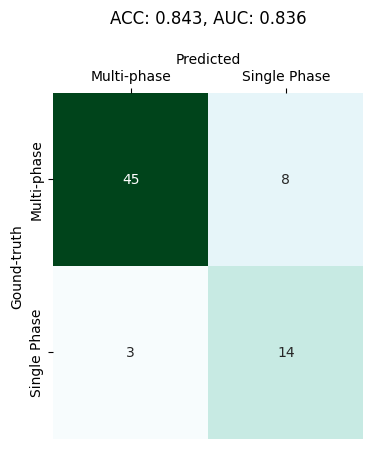

In [13]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score



# Calculate accuracy
accuracy = accuracy_score(y, predictions)
print(f'LOOCV estimate accuracy: {accuracy:.3f}')

# calculation balanced accuracy
balanced_accuracy = balanced_accuracy_score(y, predictions)
print(f'LOOCV estimate balanced accuracy: {balanced_accuracy:.3f}')

# Calculate AUC
auc = roc_auc_score(y, predictions)
print(f'LOOCV estimate AUC: {auc:.3f}')

#%% confusion matrix
from sklearn.metrics import confusion_matrix
confuse_matrix = confusion_matrix(y, predictions)

# Convert to DataFrame and replace 0 and 1
confuse_matrix_df = pd.DataFrame(confuse_matrix, 
                                 columns=['Multi-phase', 'Single Phase'], 
                                 index=['Multi-phase', 'Single Phase'])



# plot confuse matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confuse_matrix_df, annot=True, cbar=False, cmap='BuGn')
plt.xlabel('Predicted')
plt.ylabel('Gound-truth')
# show x label and x ticks on the top
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
# set fig size
plt.gcf().set_size_inches(4, 4.5)

# add metrics to the title
plt.title(f'ACC: {accuracy:.3f}, AUC: {auc:.3f}\n',fontsize=12)
plt.savefig('confusion_matrix.png', dpi=400,  bbox_inches='tight')

#%%
# train on the whole dataset
# clf.fit(X, y)

#%%
# get feature importance
# feature_importance = clf.feature_importances_
# feature_importance_df = pd.DataFrame(feature_importance, index=X.columns, columns=['Feature importance'])
# feature_importance_df = feature_importance_df.sort_values(by='Feature importance', ascending=False)
# # plot feature importance
# feature_importance_df.plot(kind='barh', figsize=(6, 8))

## Defining the grid

In [41]:
import random
from itertools import product

param_grid = {
    'metal_initial_conc': np.arange(0.2, 3.2, 0.2),
    'metal_mmol': np.arange(0.2, 2.2, 0.2),
    'K2CO3_initial_conc': np.arange(0.1, 0.5, 0.05),
    'rate': range(1, 19),
    'precipitation_order': [0, 1]
}

param_combinations = list(product(
    param_grid['metal_initial_conc'],
    param_grid['metal_mmol'],
    param_grid['K2CO3_initial_conc'],
    param_grid['rate'],
    param_grid['precipitation_order']
))

def sample_parameters_from_grid(grid, n_samples=10):
    sampled_combinations = random.sample(grid, n_samples)
    sampled_parameters = [
        {
            'metal_initial_conc': comb[0],
            'metal_mmol': comb[1],
            'K2CO3_initial_conc': comb[2],
            'rate': comb[3],
            'precipitation_order': comb[4]
        }
        for comb in sampled_combinations
    ]
    return sampled_parameters

sampled_parameters = sample_parameters_from_grid(param_combinations, n_samples=10)
df_sampled_parameters = pd.DataFrame(param_combinations, columns=['metal_initial_conc',
                                                                  'metal_mmol', 'K2CO3_initial_conc',
                                                                 'rate', 'precipitation_order'])

df_sampled_parameters

,metal_initial_conc,metal_mmol,K2CO3_initial_conc,rate,precipitation_order
0,0.2,0.2,0.10,1,0
1,0.2,0.2,0.10,1,1
2,0.2,0.2,0.10,2,0
3,0.2,0.2,0.10,2,1
4,0.2,0.2,0.10,3,0
...,...,...,...,...,...
43195,3.0,2.0,0.45,16,1
43196,3.0,2.0,0.45,17,0
43197,3.0,2.0,0.45,17,1
43198,3.0,2.0,0.45,18,0


# Golbal SHAP

Processing LeaveOneOut: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:00<00:00, 323.71it/s]


  0%|          | 0/70 [00:00<?, ?it/s]

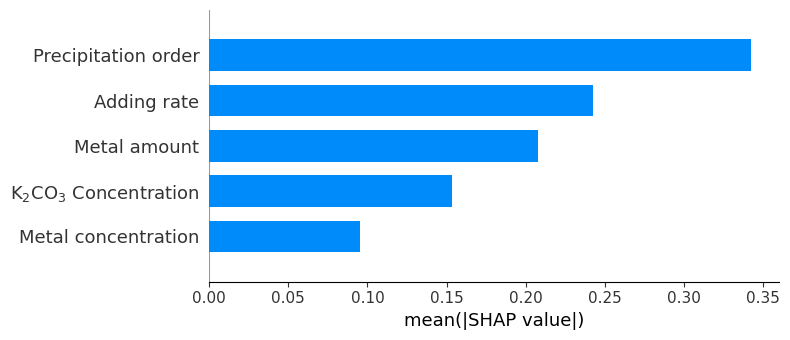

In [54]:
# Compute SHAP values for the grid (this takes forever to run so try to load the npz if you don't wanna wait!)

import shap
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut

# Define your existing function to compute distances
def compute_distances(X1, X2, kernel_type='Euclidean', gamma=0.1):
    diff = X1[:, np.newaxis, :] - X2[np.newaxis, :, :]
    if kernel_type == 'Euclidean':
        return np.sqrt(np.sum(diff**2, axis=2, keepdims=False))
    elif kernel_type == 'Manhattan':
        return np.sum(np.abs(diff), axis=2, keepdims=False)
    elif kernel_type == 'RBF':
        distance_squared = np.sum(diff**2, axis=2, keepdims=False)
        return np.exp(-gamma * distance_squared)

# Train and Predict with LOOCV (your existing function)
def train_and_predict_with_loocv(X, y, kernel_type='Euclidean', gamma=0.1, random_state=42):
    clf = SVC(kernel='rbf', probability=True, random_state=random_state, class_weight='balanced')
    loo = LeaveOneOut()
    predictions = np.zeros(len(y))
    uncertainties = np.zeros(len(y))

    for train_index, test_index in tqdm(loo.split(X), total=loo.get_n_splits(X), desc="Processing LeaveOneOut"):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        scaler = MinMaxScaler()
        X_train_S = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
        X_test_S = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

        X_train_sfs = compute_distances(X_train_S.values, X_train_S.values, kernel_type=kernel_type, gamma=gamma)
        X_test_sfs = compute_distances(X_test_S.values, X_train_S.values, kernel_type=kernel_type, gamma=gamma)

        clf.fit(X_train_sfs, y_train)

        decision_function = clf.decision_function(X_test_sfs)
        predictions[test_index] = clf.predict(X_test_sfs)
        uncertainties[test_index] = np.abs(decision_function)

    uncertainties = 1 - uncertainties / np.max(uncertainties)
    return predictions, uncertainties, clf, X_train_S, scaler

# Call the function to get predictions, uncertainties, and the fitted model
predictions, uncertainties, trained_model, X_train_S, scaler = train_and_predict_with_loocv(X, y, kernel_type='Euclidean', gamma=0.1)

# Define a custom prediction function for SHAP
def model_predict(original_features):
    # Ensure the input has feature names by converting to DataFrame
    original_features_df = pd.DataFrame(original_features, columns=X.columns)

    # Scale the original features using the same scaler as training
    scaled_features = pd.DataFrame(scaler.transform(original_features_df), columns=X.columns)

    # Compute kernel distances (Euclidean in this case) between the original features and the training set
    kernel_transformed_features = compute_distances(scaled_features.values, X_train_S.values, kernel_type='Euclidean')

    # Pass the kernel-transformed features to the trained model to get predictions
    return trained_model.decision_function(kernel_transformed_features)

# Use SHAP's KernelExplainer with the custom prediction function
explainer = shap.KernelExplainer(model_predict, X)

# Generate SHAP values for the original feature space
shap_values = explainer.shap_values(X)

# Plot SHAP summary to interpret the impact of the original features


X_with_new_names = X.copy()
X_with_new_names.columns = [
    'Metal concentration', 
    'Metal amount', 
    'K$_2$CO$_3$ Concentration', 
    'Adding rate', 
    'Precipitation order'
]

# Plot SHAP summary with custom feature names and x-axis label
plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values, 
    X_with_new_names, 
    plot_type="bar",
    show=False  # Don't show immediately so we can update the xlabel
)

# Update the xlabel
plt.xlabel('mean(|SHAP value|)')
plt.tight_layout()
plt.savefig('shap_summary_bar.png', dpi=600, bbox_inches='tight')
plt.show()


# compute SHAP values for the grid:
# Assuming you've created a grid from your param_combinations

# Standardize the grid data using the same scaler as used in the training
scaled_grid_data = pd.DataFrame(scaler.transform(df_sampled_parameters[['metal_initial_conc', 'metal_mmol', 'K2CO3_initial_conc', 'rate', 'precipitation_order']]), 
                                columns=['metal_initial_conc', 'metal_mmol', 'K2CO3_initial_conc', 'rate', 'precipitation_order'])


grid_shap_values = explainer.shap_values(scaled_grid_data)

# np.savez('grid_shap_values_test.npz', grid_shap_values=grid_shap_values)



In [40]:
grid_shap_values = np.load('grid_shap_values_test.npz')['grid_shap_values']
grid_shap_values

array([[ 0.05094735,  0.24543342, -0.25911089,  0.29487983,  0.04318445],
       [ 0.04786946,  0.27383216, -0.07046892,  0.30001709, -0.13446735],
       [ 0.05240078,  0.26554023, -0.25501964,  0.27876907,  0.0407384 ],
       ...,
       [-0.0139607 , -0.09007835,  0.83730637, -0.22489082, -0.20770709],
       [-0.00824208, -0.07220784,  0.58262386, -0.28947001,  0.09113432],
       [-0.01334468, -0.08800354,  0.83775436, -0.22269652, -0.21311245]])

/tmp/ipykernel_291817/1149271973.py:57: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(x_values, y_values, c='white', cmap="viridis",


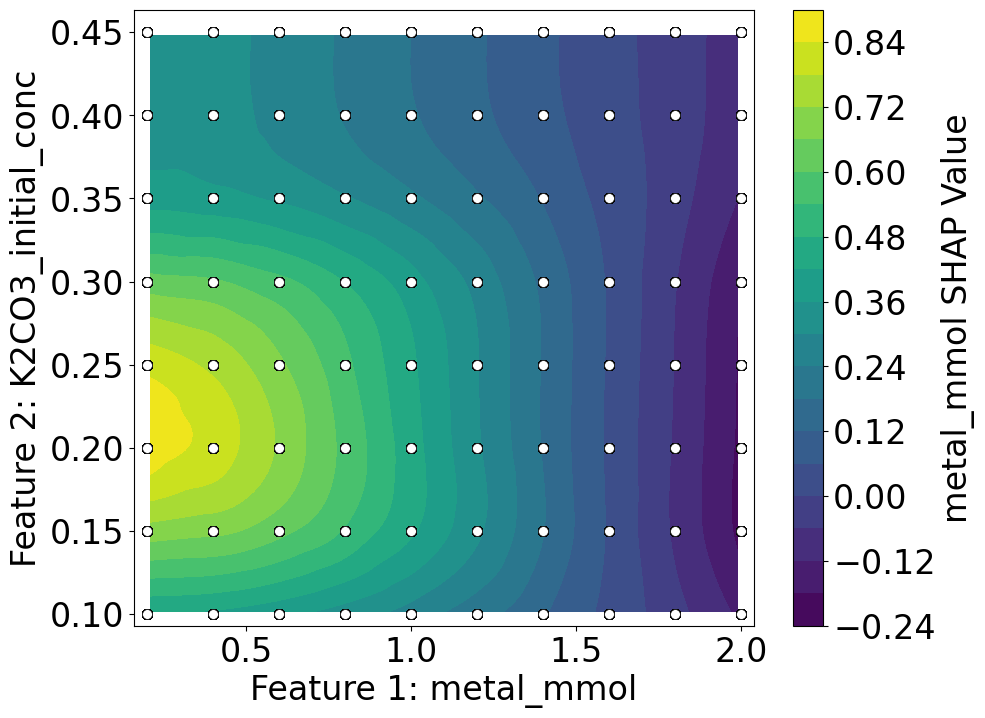

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d
from scipy.interpolate import griddata

feature_x = 'metal_mmol'
feature_y = 'K2CO3_initial_conc'
plt.rcParams.update({'font.size': 24})

n_points = -1

x_values = df_sampled_parameters[feature_x].astype(float).values[:n_points]
y_values = df_sampled_parameters[feature_y].astype(float).values[:n_points]

feature_x_index = df_sampled_parameters.columns.get_loc(feature_x)
feature_y_index = df_sampled_parameters.columns.get_loc(feature_y)

z_values = grid_shap_values[:n_points, feature_x_index]# + 
            # grid_shap_values[:n_points, feature_y_index]) / 2

mask = np.isfinite(x_values) & np.isfinite(y_values) & np.isfinite(z_values)
x_values = x_values[mask]
y_values = y_values[mask]
z_values = z_values[mask]

nbins = 600
stat, x_edge, y_edge, binnumber = binned_statistic_2d(x_values, y_values, values=z_values, 
                                                      statistic='mean', bins=nbins)

x_center = (x_edge[:-1] + x_edge[1:]) / 2
y_center = (y_edge[:-1] + y_edge[1:]) / 2

X, Y = np.meshgrid(x_center, y_center)

points = np.column_stack((X.ravel(), Y.ravel()))
values = stat.T.ravel()

mask = np.isfinite(values)
points = points[mask]
values = values[mask]

X_fine = np.linspace(x_edge.min(), x_edge.max(), 200)
Y_fine = np.linspace(y_edge.min(), y_edge.max(), 200)
X_fine, Y_fine = np.meshgrid(X_fine, Y_fine)

Z_fine = griddata(points, values, (X_fine, Y_fine), method='cubic')

plt.figure(figsize=(10, 8))
contour = plt.contourf(X_fine, Y_fine, Z_fine, levels=20, cmap="viridis")
plt.colorbar(contour, label=f'{feature_x} SHAP Value')

plt.xlabel(f'Feature 1: {feature_x}')
plt.ylabel(f'Feature 2: {feature_y}')
plt.ylim([min(y_values)*0.93, max(y_values)*1.03])
plt.xlim([min(x_values)*0.8, max(x_values)*1.02])

scatter = plt.scatter(x_values, y_values, c='white', cmap="viridis", 
                      s=50, edgecolor='black', linewidth=0.5)

if np.ptp(Z_fine) > 0:
    contour_lines = plt.contour(X_fine, Y_fine, Z_fine, levels=10, colors='black', linewidths=0.1)

# plt.tight_layout()
# plt.show()
plt.savefig(f'../figures/SHAP_{feature_x}_F1_{feature_x}_vs_F2_{feature_y}.png', dpi=600, bbox_inches='tight')

/tmp/ipykernel_291817/381773516.py:57: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(x_values, y_values, c='white', cmap="viridis",


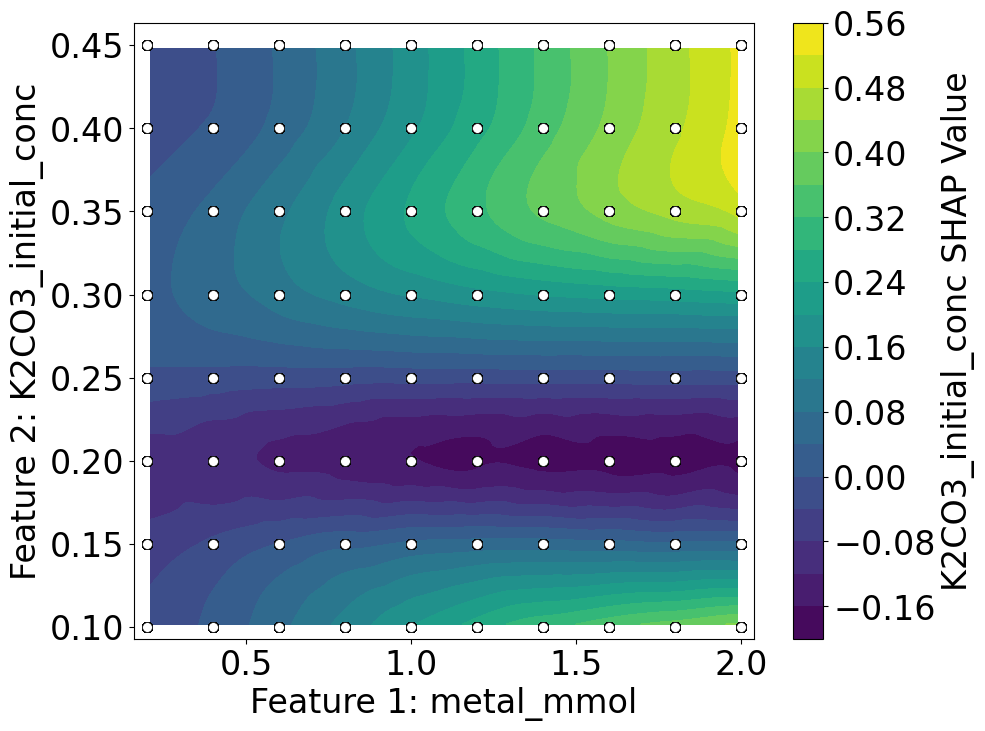

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d
from scipy.interpolate import griddata
plt.rcParams.update({'font.size': 24})

feature_x = 'metal_mmol'
feature_y = 'K2CO3_initial_conc'

n_points = -1

x_values = df_sampled_parameters[feature_x].astype(float).values[:n_points]
y_values = df_sampled_parameters[feature_y].astype(float).values[:n_points]

feature_x_index = df_sampled_parameters.columns.get_loc(feature_x)
feature_y_index = df_sampled_parameters.columns.get_loc(feature_y)

z_values = grid_shap_values[:n_points, feature_y_index]# + 
            # grid_shap_values[:n_points, feature_y_index]) / 2

mask = np.isfinite(x_values) & np.isfinite(y_values) & np.isfinite(z_values)
x_values = x_values[mask]
y_values = y_values[mask]
z_values = z_values[mask]

nbins = 600
stat, x_edge, y_edge, binnumber = binned_statistic_2d(x_values, y_values, values=z_values, 
                                                      statistic='mean', bins=nbins)

x_center = (x_edge[:-1] + x_edge[1:]) / 2
y_center = (y_edge[:-1] + y_edge[1:]) / 2

X, Y = np.meshgrid(x_center, y_center)

points = np.column_stack((X.ravel(), Y.ravel()))
values = stat.T.ravel()

mask = np.isfinite(values)
points = points[mask]
values = values[mask]

X_fine = np.linspace(x_edge.min(), x_edge.max(), 200)
Y_fine = np.linspace(y_edge.min(), y_edge.max(), 200)
X_fine, Y_fine = np.meshgrid(X_fine, Y_fine)

Z_fine = griddata(points, values, (X_fine, Y_fine), method='cubic')

plt.figure(figsize=(10, 8))
contour = plt.contourf(X_fine, Y_fine, Z_fine, levels=20, cmap="viridis")
plt.colorbar(contour, label=f'{feature_y} SHAP Value')

plt.xlabel(f'Feature 1: {feature_x}')
plt.ylabel(f'Feature 2: {feature_y}')
plt.ylim([min(y_values)*0.93, max(y_values)*1.03])
plt.xlim([min(x_values)*0.8, max(x_values)*1.02])

scatter = plt.scatter(x_values, y_values, c='white', cmap="viridis", 
                      s=50, edgecolor='black', linewidth=0.5)

if np.ptp(Z_fine) > 0:
    contour_lines = plt.contour(X_fine, Y_fine, Z_fine, levels=10, colors='black', linewidths=0.1)


plt.savefig(f'../figures/SHAP_{feature_y}_F1_{feature_x}_vs_F2_{feature_y}.png', dpi=600, bbox_inches='tight')

/tmp/ipykernel_291817/942588935.py:57: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(x_values, y_values, c='white', cmap="viridis",


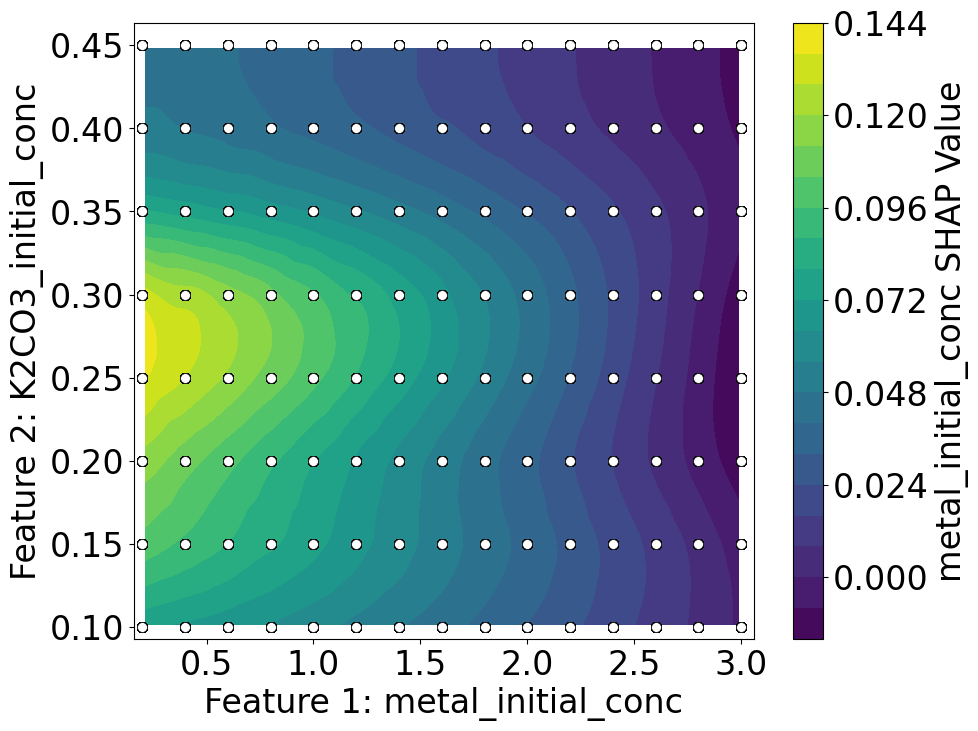

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d
from scipy.interpolate import griddata
plt.rcParams.update({'font.size': 24})

feature_x = 'metal_initial_conc'
feature_y = 'K2CO3_initial_conc'

n_points = -1

x_values = df_sampled_parameters[feature_x].astype(float).values[:n_points]
y_values = df_sampled_parameters[feature_y].astype(float).values[:n_points]

feature_x_index = df_sampled_parameters.columns.get_loc(feature_x)
feature_y_index = df_sampled_parameters.columns.get_loc(feature_y)

z_values = grid_shap_values[:n_points, feature_x_index]# + 
            # grid_shap_values[:n_points, feature_y_index]) / 2

mask = np.isfinite(x_values) & np.isfinite(y_values) & np.isfinite(z_values)
x_values = x_values[mask]
y_values = y_values[mask]
z_values = z_values[mask]

nbins = 600
stat, x_edge, y_edge, binnumber = binned_statistic_2d(x_values, y_values, values=z_values, 
                                                      statistic='mean', bins=nbins)

x_center = (x_edge[:-1] + x_edge[1:]) / 2
y_center = (y_edge[:-1] + y_edge[1:]) / 2

X, Y = np.meshgrid(x_center, y_center)

points = np.column_stack((X.ravel(), Y.ravel()))
values = stat.T.ravel()

mask = np.isfinite(values)
points = points[mask]
values = values[mask]

X_fine = np.linspace(x_edge.min(), x_edge.max(), 200)
Y_fine = np.linspace(y_edge.min(), y_edge.max(), 200)
X_fine, Y_fine = np.meshgrid(X_fine, Y_fine)

Z_fine = griddata(points, values, (X_fine, Y_fine), method='cubic')

plt.figure(figsize=(10, 8))
contour = plt.contourf(X_fine, Y_fine, Z_fine, levels=20, cmap="viridis")
plt.colorbar(contour, label=f'{feature_x} SHAP Value')

plt.xlabel(f'Feature 1: {feature_x}')
plt.ylabel(f'Feature 2: {feature_y}')
plt.ylim([min(y_values)*0.93, max(y_values)*1.03])
plt.xlim([min(x_values)*0.8, max(x_values)*1.02])

scatter = plt.scatter(x_values, y_values, c='white', cmap="viridis", 
                      s=50, edgecolor='black', linewidth=0.5)

if np.ptp(Z_fine) > 0:
    contour_lines = plt.contour(X_fine, Y_fine, Z_fine, levels=10, colors='black', linewidths=0.1)

# plt.tight_layout()
# plt.show()

plt.savefig(f'../figures/SHAP_{feature_x}_F1_{feature_x}_vs_F2_{feature_y}.png', dpi=600, bbox_inches='tight')

/tmp/ipykernel_291817/1615240646.py:57: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(x_values, y_values, c='white', cmap="viridis",


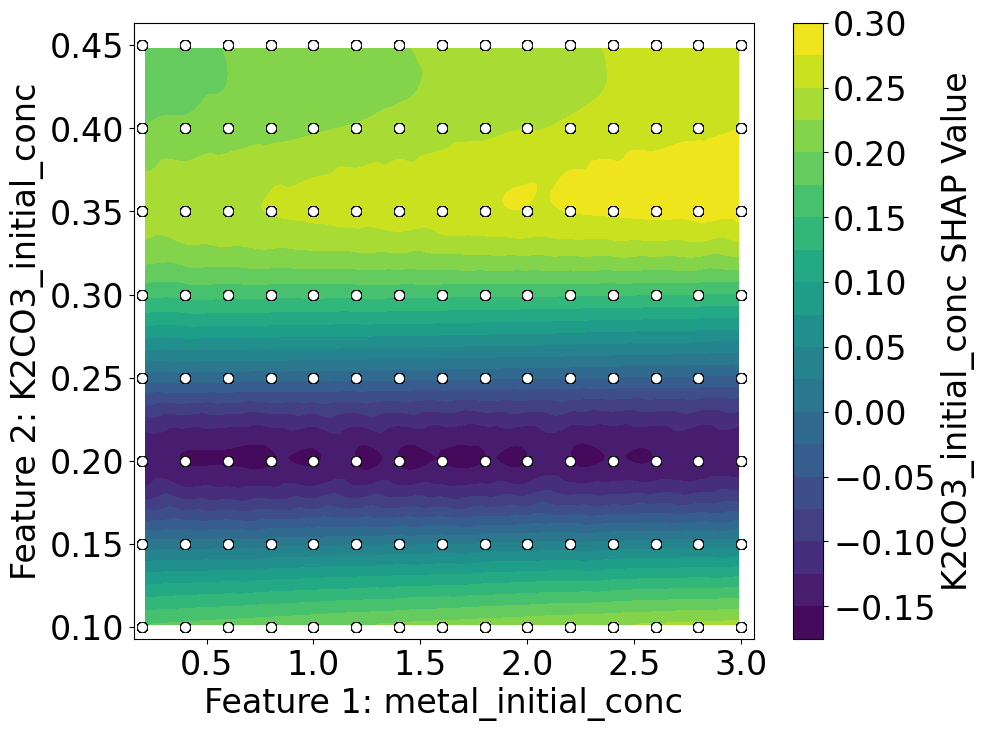

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d
from scipy.interpolate import griddata
plt.rcParams.update({'font.size': 24})

feature_x = 'metal_initial_conc'
feature_y = 'K2CO3_initial_conc'

n_points = -1

x_values = df_sampled_parameters[feature_x].astype(float).values[:n_points]
y_values = df_sampled_parameters[feature_y].astype(float).values[:n_points]

feature_x_index = df_sampled_parameters.columns.get_loc(feature_x)
feature_y_index = df_sampled_parameters.columns.get_loc(feature_y)

z_values = grid_shap_values[:n_points, feature_y_index]# + 
            # grid_shap_values[:n_points, feature_y_index]) / 2

mask = np.isfinite(x_values) & np.isfinite(y_values) & np.isfinite(z_values)
x_values = x_values[mask]
y_values = y_values[mask]
z_values = z_values[mask]

nbins = 600
stat, x_edge, y_edge, binnumber = binned_statistic_2d(x_values, y_values, values=z_values, 
                                                      statistic='mean', bins=nbins)

x_center = (x_edge[:-1] + x_edge[1:]) / 2
y_center = (y_edge[:-1] + y_edge[1:]) / 2

X, Y = np.meshgrid(x_center, y_center)

points = np.column_stack((X.ravel(), Y.ravel()))
values = stat.T.ravel()

mask = np.isfinite(values)
points = points[mask]
values = values[mask]

X_fine = np.linspace(x_edge.min(), x_edge.max(), 200)
Y_fine = np.linspace(y_edge.min(), y_edge.max(), 200)
X_fine, Y_fine = np.meshgrid(X_fine, Y_fine)

Z_fine = griddata(points, values, (X_fine, Y_fine), method='cubic')

plt.figure(figsize=(10, 8))
contour = plt.contourf(X_fine, Y_fine, Z_fine, levels=20, cmap="viridis")
plt.colorbar(contour, label=f'{feature_y} SHAP Value')

plt.xlabel(f'Feature 1: {feature_x}')
plt.ylabel(f'Feature 2: {feature_y}')
plt.ylim([min(y_values)*0.93, max(y_values)*1.03])
plt.xlim([min(x_values)*0.8, max(x_values)*1.02])

scatter = plt.scatter(x_values, y_values, c='white', cmap="viridis", 
                      s=50, edgecolor='black', linewidth=0.5)

if np.ptp(Z_fine) > 0:
    contour_lines = plt.contour(X_fine, Y_fine, Z_fine, levels=10, colors='black', linewidths=0.1)

plt.savefig(f'../figures/SHAP_{feature_y}_F1_{feature_x}_vs_F2_{feature_y}.png', dpi=600, bbox_inches='tight')

/tmp/ipykernel_291817/3778173519.py:57: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(x_values, y_values, c='white', cmap="viridis",


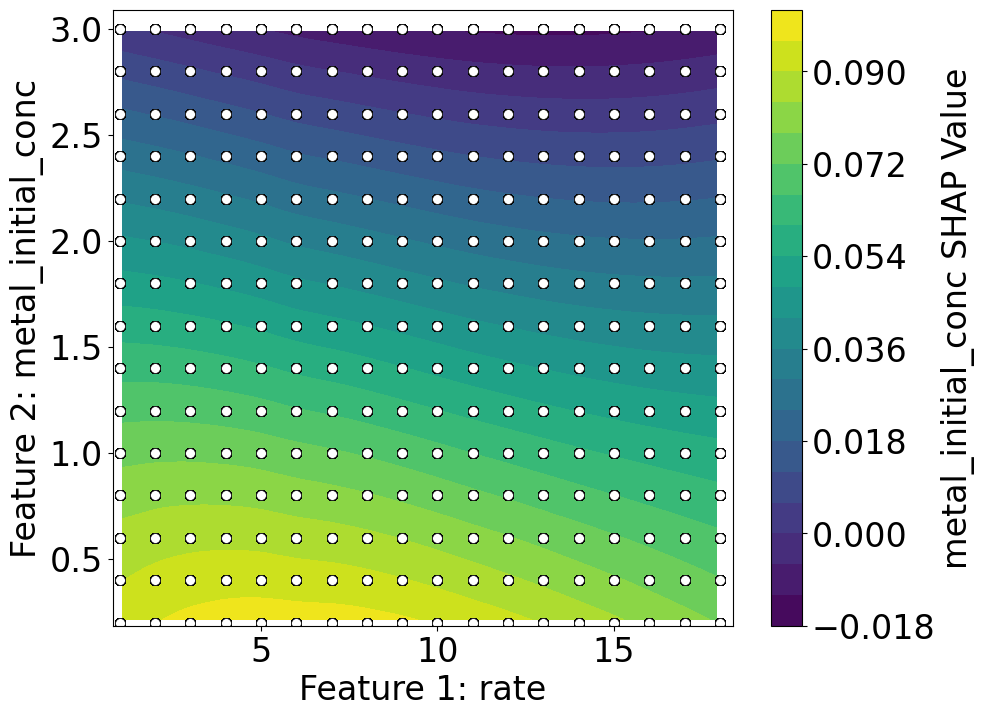

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d
from scipy.interpolate import griddata
plt.rcParams.update({'font.size': 24})

feature_x = 'rate'
feature_y = 'metal_initial_conc'

n_points = -1

x_values = df_sampled_parameters[feature_x].astype(float).values[:n_points]
y_values = df_sampled_parameters[feature_y].astype(float).values[:n_points]

feature_x_index = df_sampled_parameters.columns.get_loc(feature_x)
feature_y_index = df_sampled_parameters.columns.get_loc(feature_y)

z_values = grid_shap_values[:n_points, feature_y_index]# + 
            # grid_shap_values[:n_points, feature_y_index]) / 2

mask = np.isfinite(x_values) & np.isfinite(y_values) & np.isfinite(z_values)
x_values = x_values[mask]
y_values = y_values[mask]
z_values = z_values[mask]

nbins = 600
stat, x_edge, y_edge, binnumber = binned_statistic_2d(x_values, y_values, values=z_values, 
                                                      statistic='mean', bins=nbins)

x_center = (x_edge[:-1] + x_edge[1:]) / 2
y_center = (y_edge[:-1] + y_edge[1:]) / 2

X, Y = np.meshgrid(x_center, y_center)

points = np.column_stack((X.ravel(), Y.ravel()))
values = stat.T.ravel()

mask = np.isfinite(values)
points = points[mask]
values = values[mask]

X_fine = np.linspace(x_edge.min(), x_edge.max(), 200)
Y_fine = np.linspace(y_edge.min(), y_edge.max(), 200)
X_fine, Y_fine = np.meshgrid(X_fine, Y_fine)

Z_fine = griddata(points, values, (X_fine, Y_fine), method='cubic')

plt.figure(figsize=(10, 8))
contour = plt.contourf(X_fine, Y_fine, Z_fine, levels=20, cmap="viridis")
plt.colorbar(contour, label=f'{feature_y} SHAP Value')

plt.xlabel(f'Feature 1: {feature_x}')
plt.ylabel(f'Feature 2: {feature_y}')
plt.ylim([min(y_values)*0.93, max(y_values)*1.03])
plt.xlim([min(x_values)*0.8, max(x_values)*1.02])

scatter = plt.scatter(x_values, y_values, c='white', cmap="viridis", 
                      s=50, edgecolor='black', linewidth=0.5)

if np.ptp(Z_fine) > 0:
    contour_lines = plt.contour(X_fine, Y_fine, Z_fine, levels=10, colors='black', linewidths=0.1)

plt.savefig(f'../figures/SHAP_{feature_y}_F1_{feature_x}_vs_F2_{feature_y}.png', dpi=600, bbox_inches='tight')

/tmp/ipykernel_291817/3123601482.py:57: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(x_values, y_values, c='white', cmap="viridis",


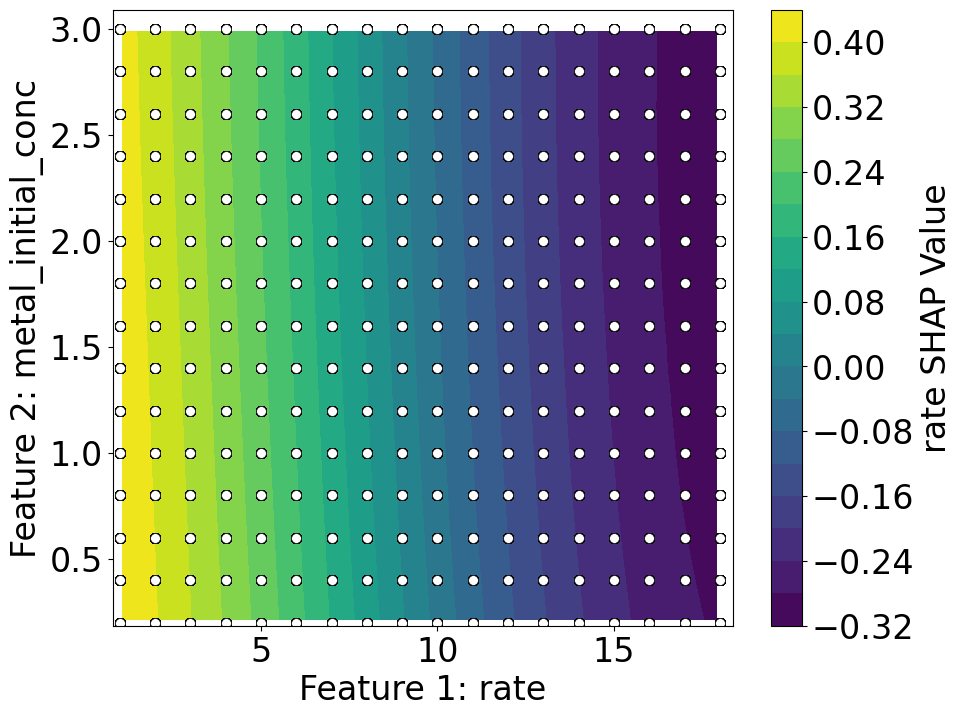

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d
from scipy.interpolate import griddata
plt.rcParams.update({'font.size': 24})

feature_x = 'rate'
feature_y = 'metal_initial_conc'

n_points = -1

x_values = df_sampled_parameters[feature_x].astype(float).values[:n_points]
y_values = df_sampled_parameters[feature_y].astype(float).values[:n_points]

feature_x_index = df_sampled_parameters.columns.get_loc(feature_x)
feature_y_index = df_sampled_parameters.columns.get_loc(feature_y)

z_values = grid_shap_values[:n_points, feature_x_index]# + 
            # grid_shap_values[:n_points, feature_y_index]) / 2

mask = np.isfinite(x_values) & np.isfinite(y_values) & np.isfinite(z_values)
x_values = x_values[mask]
y_values = y_values[mask]
z_values = z_values[mask]

nbins = 600
stat, x_edge, y_edge, binnumber = binned_statistic_2d(x_values, y_values, values=z_values, 
                                                      statistic='mean', bins=nbins)

x_center = (x_edge[:-1] + x_edge[1:]) / 2
y_center = (y_edge[:-1] + y_edge[1:]) / 2

X, Y = np.meshgrid(x_center, y_center)

points = np.column_stack((X.ravel(), Y.ravel()))
values = stat.T.ravel()

mask = np.isfinite(values)
points = points[mask]
values = values[mask]

X_fine = np.linspace(x_edge.min(), x_edge.max(), 200)
Y_fine = np.linspace(y_edge.min(), y_edge.max(), 200)
X_fine, Y_fine = np.meshgrid(X_fine, Y_fine)

Z_fine = griddata(points, values, (X_fine, Y_fine), method='cubic')

plt.figure(figsize=(10, 8))
contour = plt.contourf(X_fine, Y_fine, Z_fine, levels=20, cmap="viridis")
plt.colorbar(contour, label=f'{feature_x} SHAP Value')

plt.xlabel(f'Feature 1: {feature_x}')
plt.ylabel(f'Feature 2: {feature_y}')
plt.ylim([min(y_values)*0.93, max(y_values)*1.03])
plt.xlim([min(x_values)*0.8, max(x_values)*1.02])

scatter = plt.scatter(x_values, y_values, c='white', cmap="viridis", 
                      s=50, edgecolor='black', linewidth=0.5)

if np.ptp(Z_fine) > 0:
    contour_lines = plt.contour(X_fine, Y_fine, Z_fine, levels=10, colors='black', linewidths=0.1)

# plt.tight_layout()
# plt.show()
plt.savefig(f'../figures/SHAP_{feature_x}_F1_{feature_x}_vs_F2_{feature_y}.png', dpi=600, bbox_inches='tight')